source: https://medium.com/analytics-vidhya/titanic-machine-learning-by-k-nearest-neighbors-knn-algorithm-530d8bdd8323

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df_train = pd.read_csv("./datasets/titanic/train.csv")
df_test = pd.read_csv('./datasets/titanic/test.csv')

In [73]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Use corr function to find out the linear correlation between survived and other numerical features. 
Seeing there is a strong correlation between Survived and the features of Fare and Pclass.

The first one have strong positive relation, and the last one in the sorted list has the strong negative relation. 

In [74]:
corr_matrix = df_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

/tmp/ipykernel_387108/2478019976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Visualize the correlation of survived and other non numerical features

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
# Fill up Embarked with mode value
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: xlabel='Sex', ylabel='Survived'>

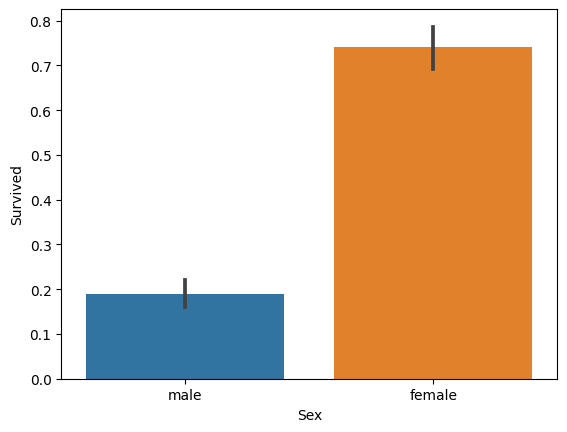

In [77]:
sns.barplot(data=df_train, x="Sex", y="Survived")


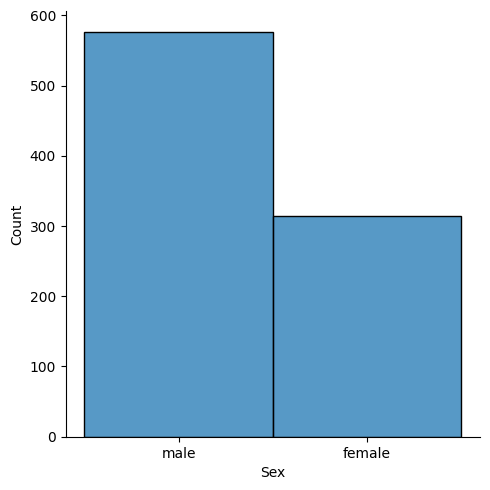

In [78]:
sns.displot(df_train['Sex'])

<AxesSubplot: xlabel='Embarked', ylabel='Count'>

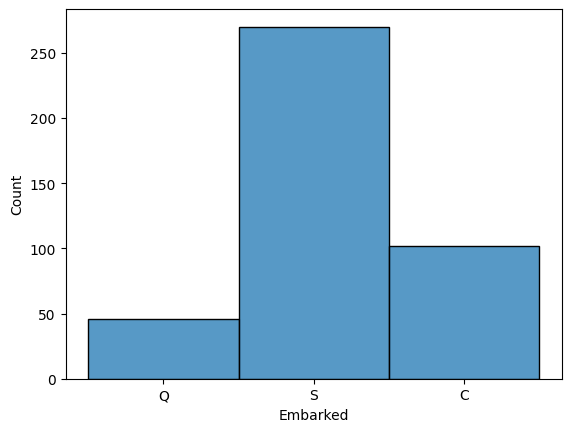

In [79]:
sns.histplot(df_test['Embarked'])

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

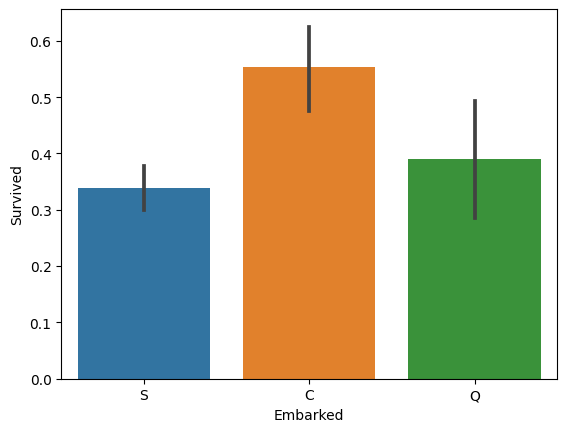

In [80]:
sns.barplot(data=df_train, x="Embarked", y="Survived")


<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

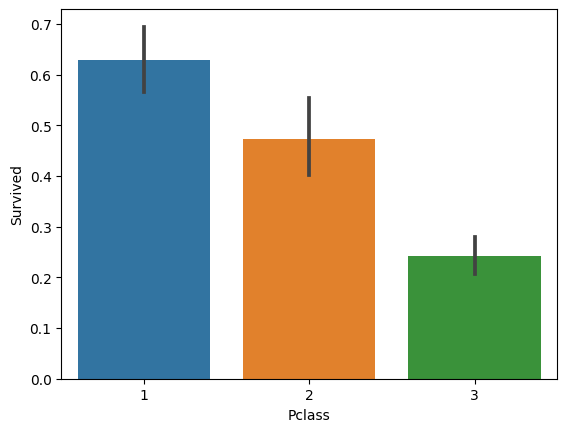

In [81]:
sns.barplot(data=df_train, x="Pclass", y="Survived")

In [82]:
q = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']

df_train_set = df_train.drop(q, axis=1)
df_test_set = df_test.drop(q, axis=1)

In [83]:
df_test_set.head()

,Pclass,Sex,Fare,Embarked
0,3,male,7.8292,Q
1,3,female,7.0000,S
2,2,male,9.6875,Q
3,3,male,8.6625,S
4,3,female,12.2875,S


In [84]:
mean = df_test_set["Fare"].mean()
df_test_set["Fare"] = df_test_set["Fare"].fillna(mean)

df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Fare      418 non-null    float64
 3   Embarked  418 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 13.2+ KB


Translate non-numerical features to numerical features

In [85]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [87]:

df_train_set.iloc[:, 2] = labelEncoder.fit_transform(df_train_set.iloc[:, 2].values)
df_train_set.iloc[:, 4] = labelEncoder.fit_transform(df_train_set.iloc[:, 4].values)

df_test_set.iloc[:, 2] = labelEncoder.fit_transform(df_test_set.iloc[:, 2].values)
df_test_set.iloc[:, 4] = labelEncoder.fit_transform(df_test_set.iloc[:, 4].values)

IndexError: single positional indexer is out-of-bounds

In [ ]:
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,1,7.2500,2
1,1,1,0,71.2833,0
2,1,3,0,7.9250,2
3,1,1,0,53.1000,2
4,0,3,1,8.0500,2
